In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
%matplotlib notebook
style.use('ggplot')

In [2]:
import bs4 as bs
import pickle
import requests

In [3]:
def save_sp500_tickers():    
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class':'wikitable sortable'})
    
    tickers= []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    
    return tickers

In [4]:
tickers = save_sp500_tickers()

In [5]:
len(tickers)

505

In [6]:
tickers[0:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES']

In [7]:
import os
import time

In [8]:
start = dt.datetime(2007,1,1)
end = dt.datetime(2016,12,31)

In [9]:
def getDataFromYahoo(reload_sp500 = False, problemCases = []):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    
    tickers = [tick.translate(str.maketrans('.','-')) for tick in tickers if tick not in problemCases]
    
    if not os.path.exists('../data/stock_dfs'):
        os.makedirs('../data/stock_dfs')
    
    for tick in tickers:
#         tick = tick.translate(str.maketrans('.','-'))
        print(tick)
        
        if not os.path.exists('../data/stock_dfs/{}.csv'.format(tick)):
            df = web.DataReader(tick, 'yahoo', start, end)
            df.to_csv('../data/stock_dfs/{}.csv'.format(tick))
            time.sleep(5)
        else:
            print('Already have {}'.format(tick))

In [10]:
getDataFromYahoo()

MMM
ABT
ABBV
ACN
ATVI
AYI
ADBE
AMD
AAP
AES
AET
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
AGN
LNT
ALXN
ALLE
ADS
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
APC
ADI
ANTM
AON
APA
AIV
AAPL
AMAT
ADM
ARNC
AJG
AIZ
T
ADSK
ADP
AN
AZO
AVB
AVY
BHI
BLL
BAC
BK
BCR
BAX
BBT
BDX
BBBY
BRK-B
BBY
BIIB
BLK
HRB
BA
BWA
BXP
BSX
BMY
AVGO
BF-B
CHRW
CA
COG
CPB
COF
CAH
CBOE
KMX
CCL
CAT
CBG
CBS
CELG
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CHK
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
COH
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
GLW
COST
COTY
CCI
CSRA
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DLPH
DAL
XRAY
DVN
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DOV
DOW
DPS
DTE
DD
DUK
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EVHC
EOG
EQT
EFX
EQIX
EQR
ESS
EL
ES
EXC
EXPE
EXPD
ESRX
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FISV
FLIR
FLS
FLR
FMC
FL
F
FTV
FBHS
BEN
FCX
GPS
GRMN
IT
GD
GE
GGP
GIS
GM
GPC
GILD
GPN
GS
GT
GWW
HAL
HBI
HOG
HRS
HIG
HAS
HCA
HCP
HP
HSIC
HSY
HES
HPE
HOLX
HD
HON
HRL
HST
HPQ
HUM
HBAN
IDXX
ITW
ILMN
I

In [11]:
def compileData():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
    
    tickers = [tick.translate(str.maketrans('.','-')) for tick in tickers] 
    
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('../data/stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        df.rename(columns = {'Adj Close':ticker}, inplace = True)
        df.drop(['Open','High','Low','Close','Volume'], axis = 1, inplace  = True)
        
        if main_df.empty:
            main_df = df
        else :
            main_df = main_df.join(df, how = 'outer')
            
        if count%10 == 0:
            print(count)
           
    main_df.to_csv('../data/sp500_joined_closes.csv')
    
    return main_df

In [12]:
main_df = compileData()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [33]:
main_df.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,73.186021,23.922941,NaN,46.809493,11.474056,51.637232,28.570000,5.48,68.327322,10.701514,...,22.493266,4.728539,28.518767,18.054286,23.192926,16.290001,37.759789,51.389615,16.245802,NaN
2012-01-04,73.790866,23.830150,NaN,46.791811,11.389412,52.718487,28.280001,5.46,69.929209,10.622048,...,22.345175,4.699706,28.219865,17.642740,23.958644,15.780000,38.017668,50.694131,16.604235,NaN
2012-01-05,73.457766,23.775320,NaN,45.898937,11.389412,51.257332,28.480000,5.46,70.374175,10.878107,...,22.443903,4.670874,28.466022,17.714313,23.617301,15.640000,38.307778,51.294345,17.069233,NaN
2012-01-06,73.080835,23.560216,NaN,45.819378,11.511676,49.016894,28.719999,5.43,70.700486,10.798640,...,22.378085,4.670874,28.281404,17.830620,23.220604,15.520000,38.584998,51.427725,17.088606,NaN
2012-01-09,73.519127,23.555997,NaN,45.739815,11.474056,53.517252,28.530001,5.59,70.680713,11.010552,...,22.394538,4.665107,28.896791,17.705368,23.312859,15.460000,38.436719,51.808813,17.321104,NaN


In [34]:
main_df.tail()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,177.593440,37.941347,61.109324,116.273701,36.277890,234.600171,105.019997,11.58,170.822192,11.484885,...,40.333419,5.844306,60.216737,37.783381,50.819819,38.660000,63.515404,101.879749,43.780399,53.567898
2016-12-27,177.762339,38.119105,61.266165,116.342982,36.307706,235.269257,104.980003,12.07,171.771812,11.612169,...,40.392924,5.837775,60.892883,37.823161,50.670381,38.919998,63.734385,102.696221,43.850272,53.508137
2016-12-28,176.927777,37.743842,61.040706,115.412631,36.208316,230.485785,103.769997,11.55,170.352378,11.396767,...,39.956566,5.720237,60.286340,37.494958,49.753809,38.730000,63.425819,102.855901,43.201450,53.229239
2016-12-29,177.255644,37.832721,61.491624,115.808526,36.258011,232.473066,103.680000,11.59,170.212434,11.455512,...,40.601185,5.694117,60.395717,37.057348,49.584444,38.639999,63.336234,103.295032,42.712341,53.408529
2016-12-30,177.414612,37.931473,61.383795,115.927289,35.890263,230.545701,102.949997,11.34,169.052890,11.377184,...,40.363173,5.700646,60.027812,37.057348,49.335376,38.669998,63.037620,102.995623,42.961888,53.318884


In [35]:
def visualizeData(ticker):
    df = pd.read_csv('../data/sp500_joined_closes.csv')
    df[ticker].plot()

<IPython.core.display.Javascript object>


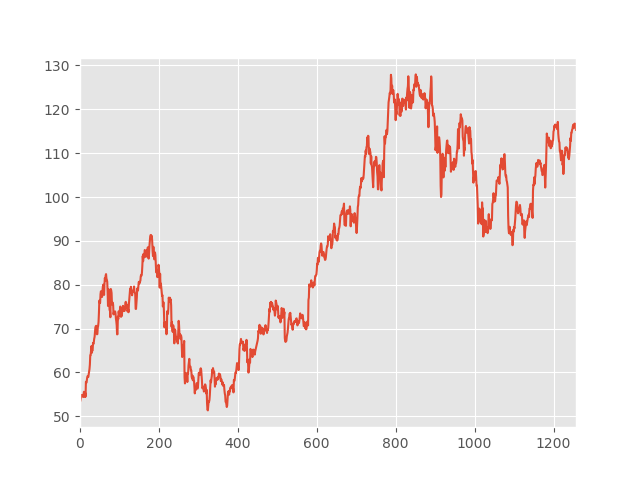

In [36]:
visualizeData('AAPL')

In [37]:
def stockCorrs():
    df = pd.read_csv('../data/sp500_joined_closes.csv')
    df_corr = df.corr()
    return df_corr

In [38]:
corrs = stockCorrs()
corrs.head(20)

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.875485,0.917590,0.924216,0.882377,0.928530,0.967375,-0.026345,0.911649,0.219523,...,0.917195,0.710023,0.851367,0.899513,0.912434,0.876130,0.855373,0.965618,0.701166,0.874646
ABT,0.875485,1.000000,0.870608,0.768213,0.690708,0.768957,0.828088,-0.333759,0.880173,0.238564,...,0.714196,0.771670,0.662173,0.927635,0.678379,0.856030,0.764609,0.895033,0.652793,0.754310
ABBV,0.917590,0.870608,1.000000,0.783880,0.740370,0.831226,0.868343,0.188658,0.896813,0.056811,...,0.786756,0.469999,0.571516,0.840387,0.748861,0.756610,0.815228,0.901949,0.366802,0.873570
ACN,0.924216,0.768213,0.783880,1.000000,0.954402,0.973104,0.964915,0.026535,0.858434,-0.029465,...,0.950054,0.439116,0.824362,0.854600,0.891415,0.681553,0.854546,0.852839,0.650819,0.892823
ATVI,0.882377,0.690708,0.740370,0.954402,1.000000,0.969956,0.955011,0.126426,0.823778,-0.045147,...,0.942490,0.388227,0.815805,0.770136,0.888989,0.603762,0.805328,0.814839,0.564857,0.823783
AYI,0.928530,0.768957,0.831226,0.973104,0.969956,1.000000,0.970703,0.045826,0.883764,-0.013578,...,0.954314,0.456942,0.823226,0.818510,0.897733,0.680666,0.851583,0.867406,0.592993,0.882646
ADBE,0.967375,0.828088,0.868343,0.964915,0.955011,0.970703,1.000000,0.024999,0.913260,0.113054,...,0.936017,0.595197,0.869166,0.881650,0.926413,0.782885,0.856152,0.916152,0.690461,0.871367
AMD,-0.026345,-0.333759,0.188658,0.026535,0.126426,0.045826,0.024999,1.000000,-0.114516,0.215495,...,0.075213,-0.233928,0.157797,-0.289409,0.276072,-0.145589,0.137802,-0.091076,0.129291,0.232265
AAP,0.911649,0.880173,0.896813,0.858434,0.823778,0.883764,0.913260,-0.114516,1.000000,0.125273,...,0.834256,0.672312,0.736721,0.873093,0.788317,0.778105,0.781806,0.871796,0.615112,0.805070
AES,0.219523,0.238564,0.056811,-0.029465,-0.045147,-0.013578,0.113054,0.215495,0.125273,1.000000,...,-0.029681,0.581618,0.269370,0.129773,0.261712,0.494525,0.251312,0.311260,0.428734,-0.326204


In [51]:
def stockCorrs():
    df = pd.read_csv('../data/sp500_joined_closes.csv')
    df_corr = df.corr()
    data = df_corr.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0] + 0.5), minor = False)
    ax.set_yticks(np.arange(data.shape[1] + 0.5), minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    
    return df_corr

<IPython.core.display.Javascript object>


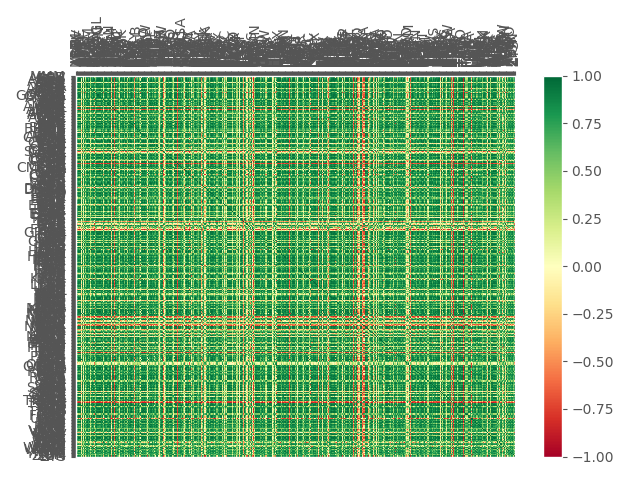

In [52]:
corrs= stockCorrs()